In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras import utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.datasets import cifar10
from tensorflow.keras.applications import VGG19

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

train_generator = ImageDataGenerator(rotation_range=2,
                                     horizontal_flip=True,
                                     rescale = 1.0/255.0,
                                     zoom_range = 0.1
                                     )

test_generator = ImageDataGenerator(rotation_range=2,
                                     horizontal_flip=True,
                                     rescale = 1.0/255.0,
                                     zoom_range = 0.1
                                     )

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [4]:
base_model = VGG19(include_top=False, weights = "imagenet",
                   input_shape = (32,32,3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024,activation=("relu")))
model.add(Dense(512,activation=("relu")))
model.add(Dense(256,activation=("relu")))
model.add(Dense(128,activation=("relu")))
model.add(Dense(10,activation=("relu")))
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")

batch_size = 75
epoch = 25
train_image_generator  = train_generator.flow(x_train,y_train_onehot,
                                         batch_size = batch_size)		 
test_image_generator  = test_generator.flow(x_test,y_test_onehot,
                                         batch_size = batch_size)		 
model.fit(train_image_generator,epochs=epoch,
          validation_data = test_image_generator)

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                         

134/134 [==============================] - 5s 39ms/step
[[   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.10      1.00      0.18      1000
           6       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


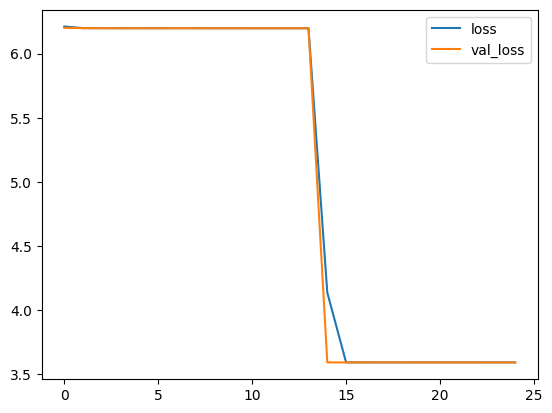

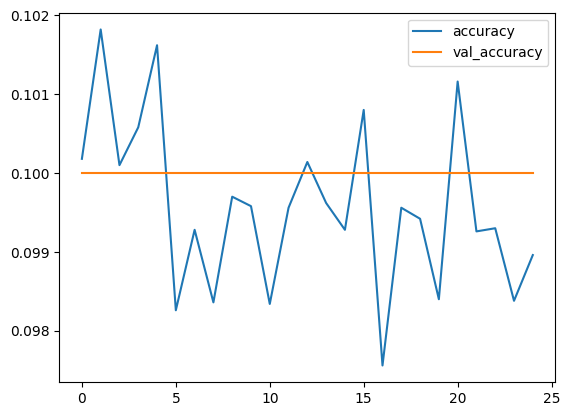

In [5]:
metrics = pd.DataFrame(model.history.history)

metrics[['loss','val_loss']].plot()

metrics[['accuracy','val_accuracy']].plot()

x_test_predictions = np.argmax(model.predict(test_image_generator), axis=1)

print(confusion_matrix(y_test,x_test_predictions))

print(classification_report(y_test,x_test_predictions))